# Dziban MKIV

In [1]:
from dziban.mkiv import Chart
from vega_datasets import data
from vega import VegaLite

## Quick Tutorial

####  Initializes a Chart with data (pandas dataframe)

In [2]:
base = Chart(data.cars())

#### Lists the fields available

In [3]:
base.get_fields()

['Acceleration',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Miles_per_Gallon',
 'Name',
 'Origin',
 'Weight_in_lbs',
 'Year']

#### Sets the mark of the chart (Charts are immutable and will always return a copy of themselves)

In [21]:
result = base.mark('bar')

#### Requests given fields

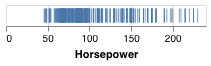

In [32]:
base.field('Horsepower')

#### You can request multiple fields, Dziban will recommend the best visualization to fit

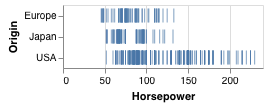

In [33]:
base.field('Horsepower', 'Origin')

#### Apply transforms!

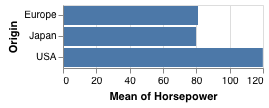

In [45]:
base.field('Horsepower', aggregate='mean').field('Origin')

#### And bin your data (try out zero, binsize, log as well!)

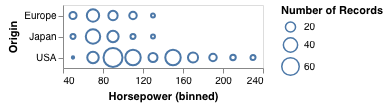

In [46]:
base.field('Horsepower', bin=True).field('Origin')

#### You can also interact with channels

In [37]:
vertical_strip = base.y(field='Horsepower')

#### And build off previous visualizations

In [42]:
count = vertical_strip.field('Horsepower', aggregate='count')

#### Use anchoring to request visualizations similar to a previous chart

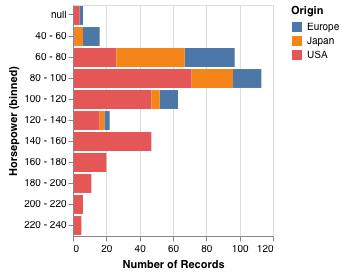

In [44]:
count.field('Origin').anchor_on(count)

## Demos

### Example 1 (Simple Cold Recommendation)

A user is analyzing the cars dataset. They begin by asking the question, 'How does horsepower relate to MPG?' They can formulate such a query as such.

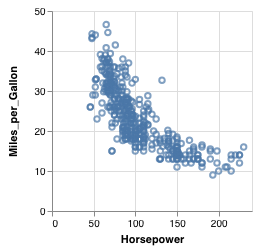

In [4]:
scatter = base.field('Horsepower', 'Miles_per_Gallon')
scatter

A simple scatterplot is recommended. This is the basis of recommendation with __Dziban__, but we can also build upon this result.

### Example 2 (Value of Anchored Recommendation)

Now, taking a look at `scatter`, a trend is visible: increasing __horsepower__ is correlated with decreasing __MPG__. To confirm this, they may which to view an aggregate metric: the mean of the horsepower in relation to MPG.

A __cold__ recommendation would yield the following.




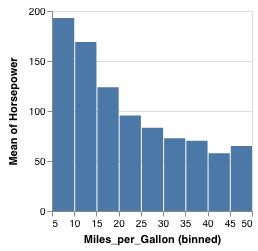

In [5]:
base.field('Miles_per_Gallon').field('Horsepower', aggregate='mean')

Note that a few things have changed that may be confusing. First, the x and y axes were swapped. The pattern seen in the previous visualization has been flipped. Second, the `zero` baseline for MPG has been removed, which again makes comparison difficult. A better visualization would be one that has been __anchored__, and thus changes the least number of items whilst optimizing effectiveness.



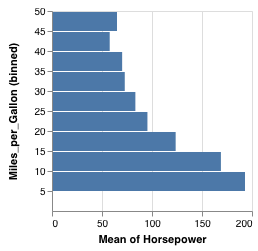

In [6]:
aggregate_anchored = scatter.field('Horsepower', aggregate='mean').anchor_on(scatter)
aggregate_anchored

### Example 3 (Value of Anchored Recommendation)

Suppose now the user has begun with the bar chart we left off on in __example 1__, `good_binned`. They wish to see this relationship, but additionally as pertains to the country of __origin__. That is, they wish to see the relationship between mean horsepower, miles per gallon, and origin. A recommendation from scratch would be as such.

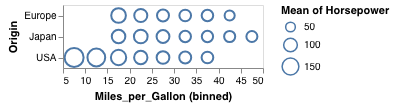

In [7]:
origin_bad = base.field('Miles_per_Gallon', 'Origin').field('Horsepower', aggregate='mean')
origin_bad

Again, however, reading this chart will require additional time, as many encodings have been moved around (MPG from y to x, horsepower from x to size, bar mark to point mark). To minimize the cognitive load made on users, we should preserve the encodings present in `good_binned` above (the user's reference point).

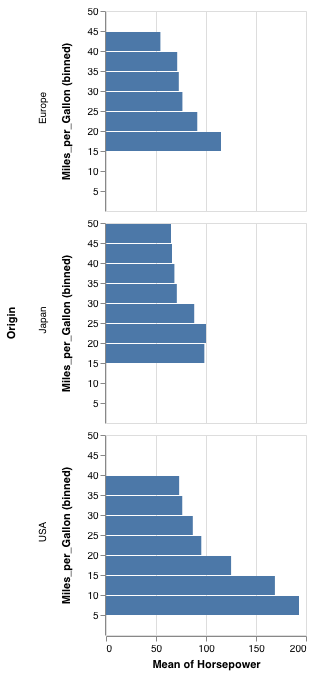

In [8]:
origin_good = aggregate_anchored.field('Origin').anchor_on(aggregate_anchored)
origin_good

### Example 4 (Value of Quick Recommendation)

__base__

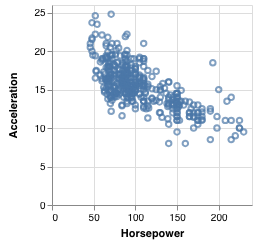

In [15]:
strip = base.field('Horsepower', 'Acceleration')
strip


__quick aggregation__ (this is otherwise nontrivial to execute in Altair)

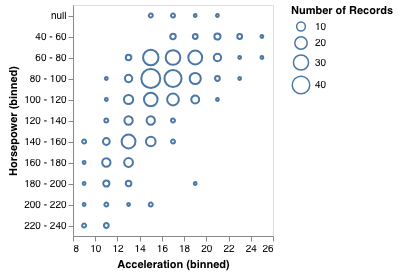

In [20]:
aggregate = strip.field('Horsepower', 'Acceleration', aggregate='count')
aggregate

__switching mark automatically switches aggregation channel__ (otherwise would result in an inexpressive visualization)

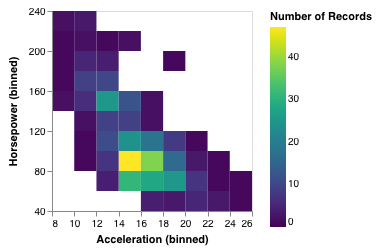

In [19]:
aggregate.mark('rect')

### Example 5 (Value of Anchored Recommendation)

__base__

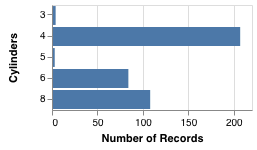

In [22]:
strip = base.field('Cylinders', aggregate='count')
strip

__cold recommendation__ (not the pattern we were looking for)

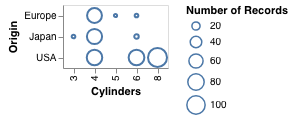

In [23]:
strip.field('Origin')

__anchored recommendation__ (stacks on color, also nontrivial to execute in Altair)

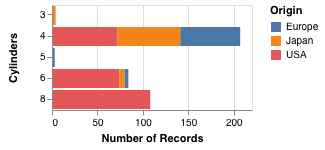

In [24]:
strip.field('Origin').anchor_on(strip)

### Example 6 (Value of Anchored Recommendation)

__base__

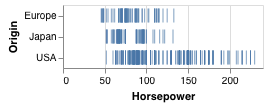

In [25]:
strip = base.field('Horsepower', 'Origin')
strip

__cold recommendation__ (again, not the pattern we were looking for)

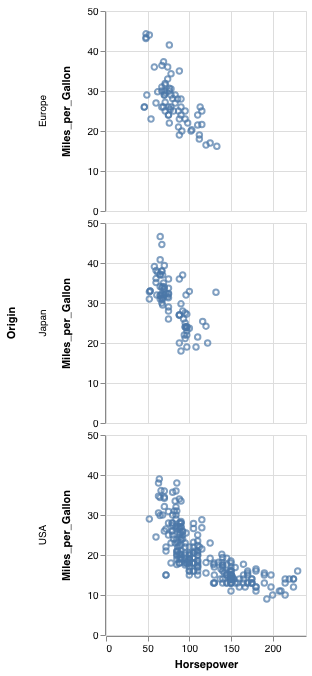

In [29]:
strip.field('Miles_per_Gallon')

__anchored recommendation__ (matches the original visualization well!))

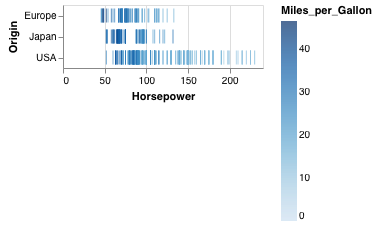

In [30]:
strip.field('Miles_per_Gallon').anchor_on(strip)